In [1]:
from caveclient import CAVEclient
from cloudvolume import CloudVolume, VolumeCutout
import numpy as np
import matplotlib.pyplot as plt
from utils.cast_to_bounds import cast_points_within_bounds

In [5]:
# client = CAVEclient('minnie65_phase3_v1')

em = CloudVolume('s3://bossdb-open-data/iarpa_microns/minnie/minnie65/seg', 
                use_https=True, mip=(16,16,40), parallel=True, fill_missing=True,
                progress=True)
b_bounds = [26000,220608,30304/4,161376,14825,27881]
point = [321687//4, 116970//4, 16925]
casted = cast_points_within_bounds(point, bounds=b_bounds)
em = em[casted[0]:casted[1],casted[2]:casted[3],casted[4]:casted[5]]

Decompressing: 100%|██████████| 12/12 [00:00<00:00, 3559.02it/s]


In [6]:
print(np.count_nonzero(em))

800000


/home/luzhou/campfire/venv/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/luzhou/campfire/venv/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


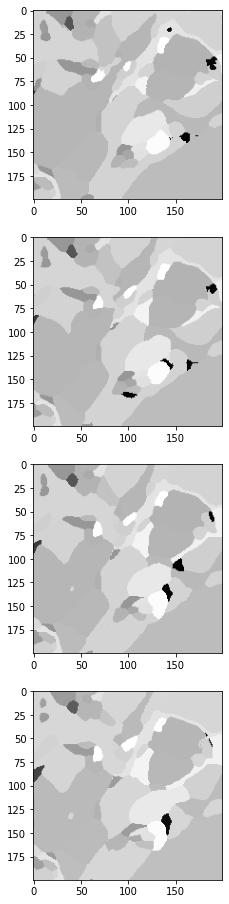

In [7]:
fig, ax = plt.subplots(4, 1, figsize=(4,16))
ax[0].imshow(em[:,:,0], cmap='gray')
ax[1].imshow(em[:,:,1], cmap='gray')
ax[2].imshow(em[:,:,2], cmap='gray')
ax[3].imshow(em[:,:,3], cmap='gray')
plt.show()